# Practice With Metrics

In this lab you are going to build a classification model to predic if a breast tumour is cancerous or not. Then we will make predicts and try out different metrics.
The point of the lab is to play with the metrics and see how they work.

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()
data.target = pd.Series(data.target)

## Reverse the labels because for some reason scikit learn stores the cancer as 0 and benign as 1, 
# this is opposite what everyone else in the world does
data.target.replace({0:1, 1:0}, inplace=True)

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Build a simple Classification Model

We are going to use the most basic decision tree possible, don't worry we will learn how these works in the next module, but for now you can pretent they are magic!

The decision tree model will output classification predictions for us - is it cancer or not!

In [38]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 2022)

In [39]:
## make our training and test sets
X_train, X_test, y_train,y_test = train_test_split(data.data, data.target, stratify = data.target)
clf.fit(X_train,y_train)
pred = clf.predict(X_train)
predictions = clf.predict(X_test)

### Let's try out some metrics

Now we have a set of predictions on our test set, your job is to try out different metrics with our prediction.
You can try

  * accuracy
  * f1-score
  * precision
  * recall
  * confusion matrices
  * classification reports
  
Whatever other metrics you would like to try.  Note that each metric requires you to pass two arguments, the `y_true` and the `y_pred`.  `y_true` represents the _ground truth_ labels of the data we are examining.  `y_pred` represents the predictions that we made.  The classification metric will compare these two things and give you some numbers back.  **It is very important that you pass them in the correct order, otherwise you will swap the truth with predictions!**.  This swapping does not matter for the accuracy metric (which is only concerned with matching correct cases) but it matters very much with every other metric.

In our case `y_pred` is `predictions`, and `y_true` is our `y_test`.


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, fbeta_score

I will do the first one for you, and then you can follow the pattern, it's pretty straightforward. Remember you can use _shift-tab_ to read the documentation string.

In [41]:
## precision
precision = precision_score(y_test,predictions)
print(precision)

0.9622641509433962


In [42]:
## recall
recall = recall_score(y_test, predictions)
print(recall)


0.9622641509433962


In [43]:
## f1_score
f1 = f1_score(y_test, predictions)
f2 = f1_score(y_train, pred)
print(f1)
print(f2)

0.9622641509433962
0.9240924092409241


In [44]:
## fbeta_score
## you can control the beta variable in the f-score here
fb = fbeta_score(y_test, predictions, beta=2)
print(fb)

0.9622641509433962


In [45]:
## Confusion Matrix
## Remember this matrix is confusing! Scikit-learn does it backwards...:grin:
c = confusion_matrix(y_test, predictions)
print(c)


[[88  2]
 [ 2 51]]


In [35]:
## Classification Report
cl = classification_report(y_test, predictions)
print(cl)


              precision    recall  f1-score   support

           0       0.96      0.89      0.92        90
           1       0.83      0.94      0.88        53

    accuracy                           0.91       143
   macro avg       0.90      0.92      0.90       143
weighted avg       0.92      0.91      0.91       143



In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

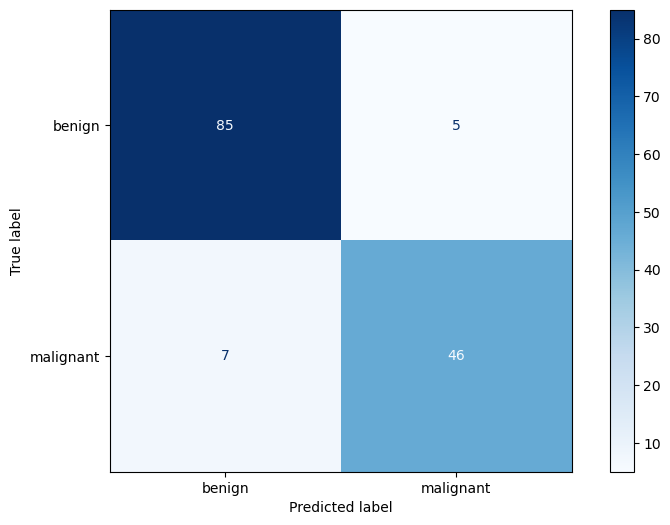

In [14]:
# we perform a flip on the target names, to match 1==malignant and 0==benign

c = ConfusionMatrixDisplay(confusion_matrix(y_test,predictions), display_labels=np.flip(data.target_names))
fig, ax = plt.subplots(figsize=(10,6))
c.plot(ax = ax, cmap='Blues', xticks_rotation = 0)

[Text(0.5336538461538461, 0.9375, 'x[22] <= 105.95\ngini = 0.468\nsamples = 426\nvalue = [267, 159]'),
 Text(0.3557692307692308, 0.8125, 'x[27] <= 0.158\ngini = 0.095\nsamples = 261\nvalue = [248, 13]'),
 Text(0.25, 0.6875, 'x[13] <= 48.975\ngini = 0.046\nsamples = 252\nvalue = [246, 6]'),
 Text(0.15384615384615385, 0.5625, 'x[27] <= 0.135\ngini = 0.032\nsamples = 249\nvalue = [245, 4]'),
 Text(0.07692307692307693, 0.4375, 'x[21] <= 33.35\ngini = 0.008\nsamples = 238\nvalue = [237, 1]'),
 Text(0.038461538461538464, 0.3125, 'gini = 0.0\nsamples = 224\nvalue = [224, 0]'),
 Text(0.11538461538461539, 0.3125, 'x[27] <= 0.092\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.07692307692307693, 0.1875, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.15384615384615385, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.4375, 'x[1] <= 21.385\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.19230769230769232, 0.3125, 'gini = 0.0\nsamples = 8\nvalue

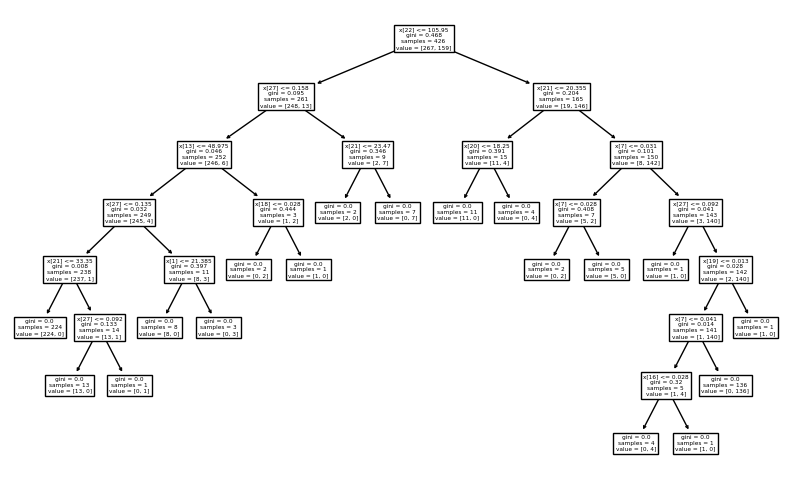

In [15]:
# this is a little sneak peak at the next module!

from sklearn import tree
fig, ax = plt.subplots(figsize=(10,6))
tree.plot_tree(clf, ax =ax)